Explorando datos con Python - datos del mundo real
En el último cuaderno, vimos las calificaciones de los datos de nuestros alumnos e investigamos los datos visualmente con histogramas y gráficos de caja. Ahora estudiaremos casos más complejos, describiremos los datos más detalladamente y discutiremos cómo hacer comparaciones básicas entre los datos.

Distribuciones de datos del mundo real
Anteriormente, observamos las calificaciones de nuestros datos de estudiantes y estimamos a partir de esta muestra cómo podría ser la población completa de calificaciones. Vamos a refrescar nuestra memoria y echar un vistazo a estos datos de nuevo.

Ejecuta el siguiente código para imprimir los datos y hacer un histograma + diagrama de caja que muestre las calificaciones de nuestra muestra de estudiantes.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)


# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

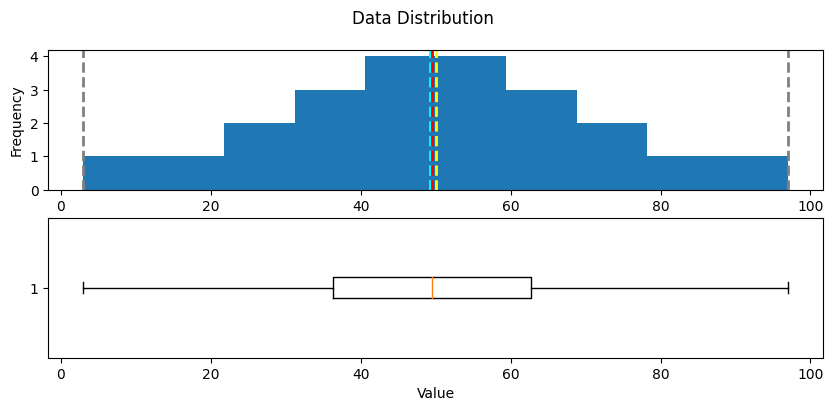

Como recordará, nuestros datos tenían la media y la moda en el centro, y los datos se distribuían simétricamente a partir de ahí.

Veamos ahora la distribución de los datos de las horas de estudio.

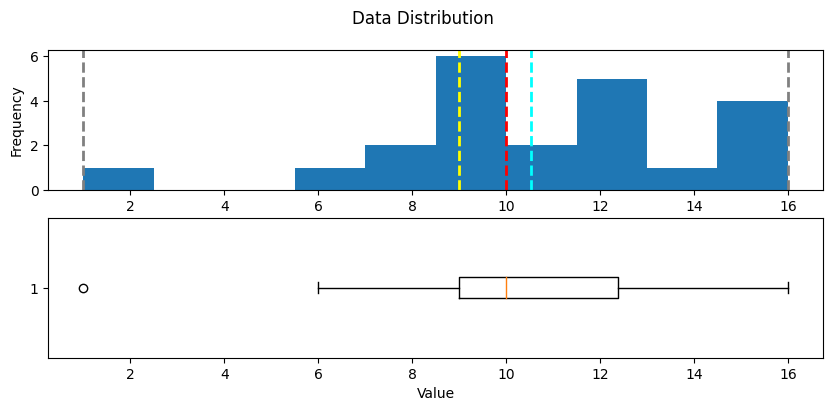

La distribución de los datos del tiempo de estudio es significativamente diferente de la de las calificaciones.

Obsérvese que los bigotes del diagrama de caja sólo comienzan en torno a 6,0, lo que indica que la gran mayoría del primer trimestre de los datos está por encima de este valor. El mínimo está marcado con una o, lo que indica que es estadísticamente un valor atípico, es decir, un valor que se encuentra significativamente fuera del rango del resto de la distribución.

Los valores atípicos pueden producirse por muchas razones. Tal vez un estudiante quería registrar "10" horas de estudio, pero introdujo "1" y se saltó el "0". O puede que el alumno fuera anormalmente perezoso a la hora de estudiar. En cualquier caso, se trata de una anomalía estadística que no representa a un estudiante típico. Veamos cómo es la distribución sin ella.

In [ ]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

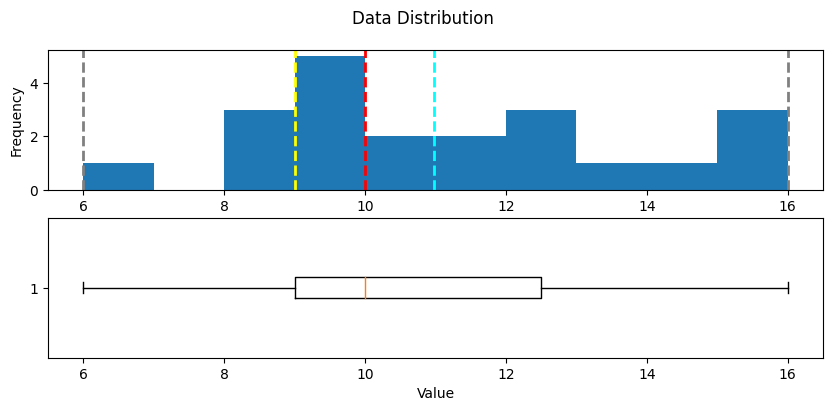

A efectos de aprendizaje, hemos tratado aquí el valor 1 como un verdadero valor atípico y lo hemos excluido. En el mundo real, sería inusual excluir datos en los extremos sin más justificación cuando el tamaño de nuestra muestra es tan pequeño. Esto se debe a que cuanto menor sea el tamaño de nuestra muestra, más probable es que nuestro muestreo sea una mala representación de toda la población. (En este caso, la población se refiere a las notas de todos los alumnos, no sólo de nuestros 22.) Por ejemplo, si tomáramos una muestra del tiempo de estudio de otros 1.000 alumnos, ¡podríamos descubrir que en realidad es bastante común no estudiar mucho!

Cuando disponemos de más datos, nuestra muestra es más fiable. Esto hace que sea más fácil considerar los valores atípicos como valores que caen por debajo o por encima de los percentiles dentro de los cuales se encuentran la mayoría de los datos. Por ejemplo, el siguiente código utiliza la función cuantil de Pandas para excluir las observaciones por debajo del percentil 0,01 (el valor por encima del cual se encuentra el 99% de los datos).

In [ ]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

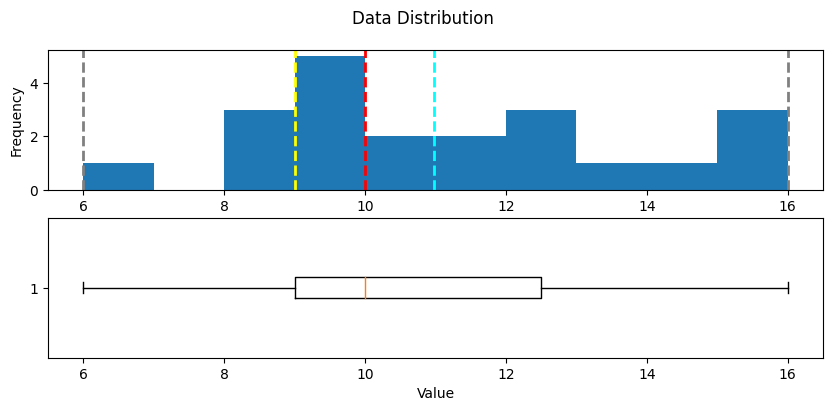

Una vez eliminados los valores atípicos, el diagrama de cajas muestra todos los datos dentro de los cuatro cuartiles. Obsérvese que la distribución no es simétrica como en el caso de las notas. Hay algunos alumnos con tiempos de estudio muy elevados, en torno a las 16 horas, pero el grueso de los datos se sitúa entre 7 y 13 horas. Los pocos valores extremadamente altos empujan la media hacia el extremo superior de la escala.

Veamos la densidad de esta distribución.

In [ ]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)

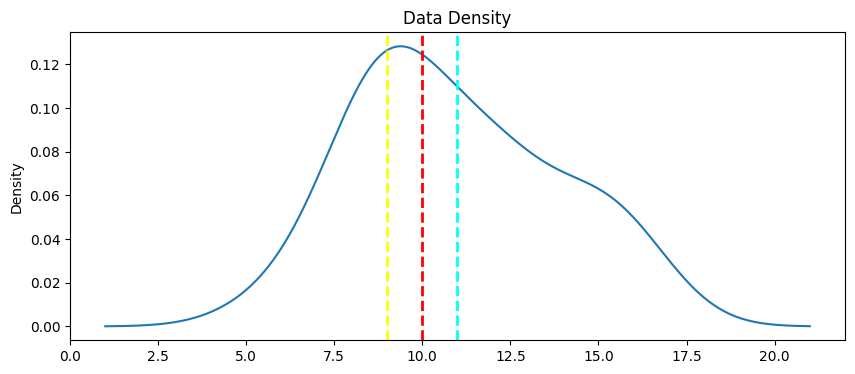

Este tipo de distribución se denomina sesgada a la derecha. La masa de los datos se encuentra en el lado izquierdo de la distribución, lo que crea una larga cola hacia la derecha debido a los valores del extremo superior, que tiran de la media hacia la derecha.

Medidas de varianza
Así que ahora tenemos una buena idea de dónde está el centro de las distribuciones de datos de calificaciones y horas de estudio. Sin embargo, hay otro aspecto de las distribuciones que deberíamos examinar: ¿cuánta variabilidad hay en los datos?

Los estadísticos típicos que miden la variabilidad en los datos incluyen:

Rango: La diferencia entre el máximo y el mínimo. No hay una función incorporada para esto, pero es fácil de calcular utilizando las funciones mín y máx.
Varianza: La media de la diferencia al cuadrado de la media. Puede utilizar la función incorporada var para encontrarla.
Desviación estándar: La raíz cuadrada de la varianza. Puede utilizar la función std para calcularla.

In [ ]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))

De estas estadísticas, la desviación estándar es generalmente la más útil. Proporciona una medida de la varianza de los datos en la misma escala que los propios datos (es decir, puntos de calificación para la distribución de Calificaciones y horas para la distribución de Horas de estudio). Cuanto mayor sea la desviación estándar, mayor será la varianza al comparar los valores de la distribución con la media de la distribución; en otras palabras, los datos están más dispersos.

Cuando se trabaja con una distribución normal, la desviación estándar trabaja con las características particulares de una distribución normal para proporcionar una visión aún mayor. Ejecute la siguiente celda para ver la relación entre las desviaciones estándar y los datos de la distribución normal.

In [ ]:
import scipy.stats as stats

# Get the Grade column
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()

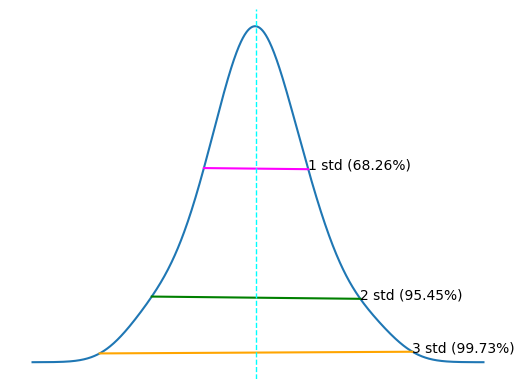

Las líneas horizontales muestran el porcentaje de datos dentro de 1, 2 y 3 desviaciones estándar de la media (más o menos).<br>

En cualquier distribución normal<br>

Aproximadamente el 68,26% de los valores se sitúan dentro de una desviación típica de la media.<br>
Aproximadamente el 95,45% de los valores se sitúan a dos desviaciones estándar de la media.<br>
Aproximadamente el 99,73% de los valores se sitúan a tres desviaciones típicas de la media.<br>
Por lo tanto, como sabemos que la nota media es 49,18, la desviación típica es 21,74 y la distribución de las notas es aproximadamente normal, podemos calcular que el 68,26% de los alumnos debería obtener una nota entre 27,44 y 70,92.<br>

Los estadísticos descriptivos que hemos utilizado para comprender la distribución de las variables de datos de los alumnos son la base del análisis estadístico. Debido a que son una parte tan importante de la exploración de sus datos, hay un método incorporado de descripción del objeto DataFrame que devuelve los principales estadísticos descriptivos para todas las columnas numéricas.

In [ ]:
df_students.describe()

Comparación de datos
Ahora que sabe algo sobre la distribución estadística de los datos de su conjunto de datos, está listo para examinar sus datos para identificar cualquier relación aparente entre las variables.

En primer lugar, vamos a deshacernos de las filas que contengan valores atípicos para tener una muestra representativa de una clase típica de estudiantes. Identificamos que la columna Horas de estudio contiene algunos valores atípicos con valores extremadamente bajos, por lo que eliminaremos esas filas.

In [ ]:
df_sample = df_students[df_students['StudyHours']>1]
df_sample

Comparación de variables numéricas y categóricas
Los datos incluyen dos variables numéricas (Horas de estudio y Calificación) y dos variables categóricas (Nombre y Aprobado). Empecemos comparando la columna numérica Horas de estudio con la columna categórica Aprobado para ver si existe una relación aparente entre el número de horas estudiadas y la calificación de aprobado.

Para realizar esta comparación, vamos a crear gráficos de caja que muestren la distribución de Horas de estudio para cada posible valor de Aprobado (verdadero y falso).

In [ ]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

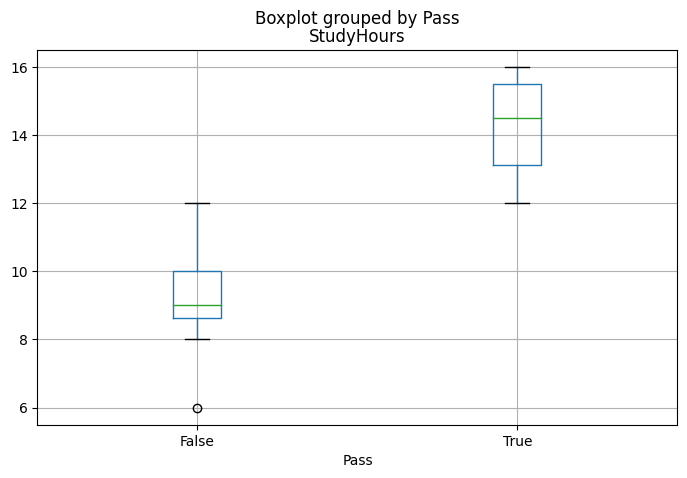

Al comparar las distribuciones de StudyHours, resulta inmediatamente evidente (aunque no especialmente sorprendente) que los alumnos que aprobaron el curso tendieron a estudiar más horas que los que no lo hicieron. Por tanto, si se quiere predecir si un alumno tiene probabilidades de aprobar el curso, la cantidad de tiempo que dedica a estudiar puede ser un buen indicador predictivo.

Comparación de variables numéricas
Ahora vamos a comparar dos variables numéricas. Empezaremos creando un gráfico de barras que muestre tanto la nota como las horas de estudio.

In [ ]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

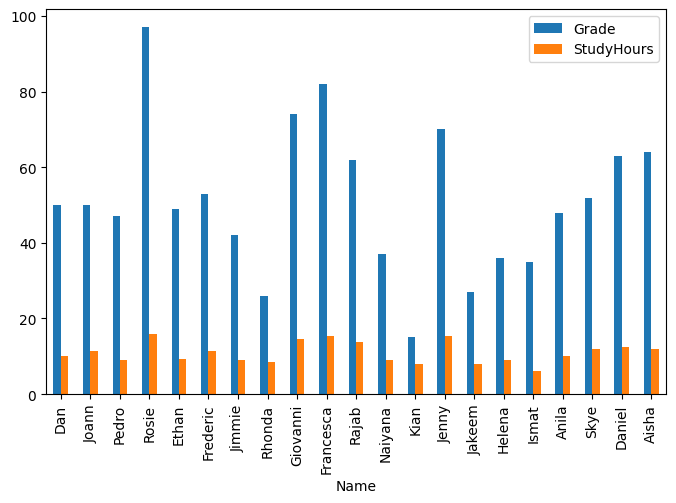

El gráfico muestra barras tanto para la nota como para las horas de estudio de cada estudiante, pero no es fácil comparar porque los valores están en escalas diferentes. La nota se mide en puntos (y oscila entre 3 y 97), y el tiempo de estudio se mide en horas (y oscila entre 1 y 16).

Una técnica habitual cuando se trabaja con datos numéricos en diferentes escalas es normalizar los datos para que los valores conserven su distribución proporcional pero se midan en la misma escala. Para lograrlo, utilizaremos una técnica llamada escalado MinMax que distribuye los valores proporcionalmente en una escala de 0 a 1. Usted podría escribir el código para aplicar esta transformación, pero la biblioteca Scikit-Learn proporciona un escalador que lo hace por usted.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

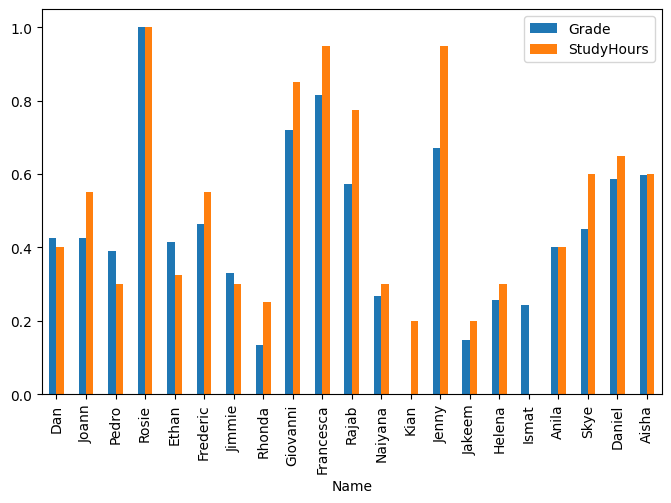

Con los datos normalizados, es más fácil ver una relación aparente entre la nota y el tiempo de estudio. No es una correspondencia exacta, pero sin duda parece que los estudiantes con notas más altas tienden a haber estudiado más.

Así que parece haber una correlación entre el tiempo de estudio y la nota. De hecho, existe una medida de correlación estadística que podemos utilizar para cuantificar la relación entre estas columnas.

In [ ]:
df_normalized.Grade.corr(df_normalized.StudyHours)

El estadístico de correlación es un valor comprendido entre -1 y 1 que indica la fuerza de una relación. Los valores superiores a 0 indican una correlación positiva (los valores altos de una variable tienden a coincidir con los valores altos de la otra), mientras que los valores inferiores a 0 indican una correlación negativa (los valores altos de una variable tienden a coincidir con los valores bajos de la otra). En este caso, el valor de la correlación es cercano a 1, lo que muestra una correlación fuertemente positiva entre el tiempo de estudio y la nota.

Otra forma de visualizar la correlación aparente entre dos columnas numéricas es utilizar un gráfico de dispersión.

In [ ]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

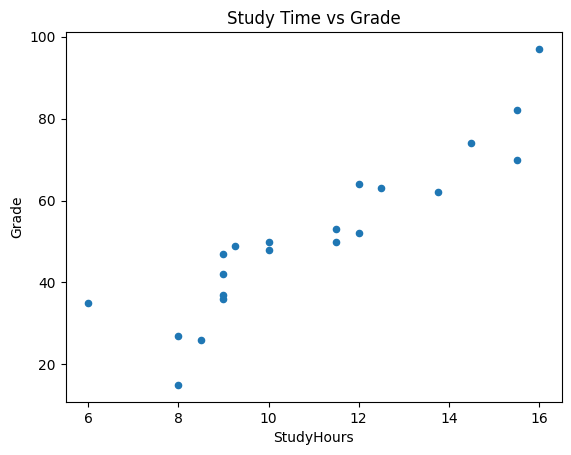

De nuevo, parece que hay un patrón discernible en el que los estudiantes que estudiaron más horas son también los que obtuvieron las notas más altas.
Podemos ver esto más claramente añadiendo una línea de regresión (o una línea de mejor ajuste) al gráfico que muestra la tendencia general de los datos. Para ello, utilizaremos una técnica estadística llamada regresión por mínimos cuadrados.
Recuerda cuando aprendiste a resolver ecuaciones lineales en la escuela, y recuerda que la forma pendiente-intersección de una ecuación lineal se parece a esto:

y=mx+b

En esta ecuación,Y y X son las variables de coordenadas, m es la pendiente de la recta y b es la intersección (el punto en el que la recta pasa por el eje Y).

En el caso del diagrama de dispersión de los datos de los alumnos, ya tenemos los valores de x (Horas de estudio) e y (Calificación), así que sólo tenemos que calcular la intersección y la pendiente de la línea recta más cercana a esos puntos. A continuación, podemos formar una ecuación lineal que calcule un nuevo valor de y en esa recta para cada uno de nuestros valores de x (Horas de estudio). Para evitar confusiones, llamaremos a este nuevo valor y f(x) (porque es la salida de una función de ecuación lineal basada en x). La diferencia entre el valor original y (Calificación) y el valor f(x) es el error entre nuestra línea de regresión y la calificación real obtenida por el estudiante. Nuestro objetivo es calcular la pendiente y el intercepto de una recta con el menor error global.
En concreto, definimos el error global tomando el error de cada punto, elevándolo al cuadrado y sumando todos los errores al cuadrado. La línea de mejor ajuste es la línea que nos da el valor más bajo para la suma de los errores al cuadrado, de ahí el nombre de regresión por mínimos cuadrados.
Afortunadamente, no es necesario que codifique usted mismo el cálculo de regresión. El paquete SciPy incluye una clase de estadísticas que proporciona un método linregress para hacer el trabajo duro por usted. Esto devuelve (entre otras cosas) los coeficientes que necesita para la ecuación de la pendiente: pendiente (m) e intercepción (b) basada en un par dado de muestras de variables que desea comparar.

In [ ]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

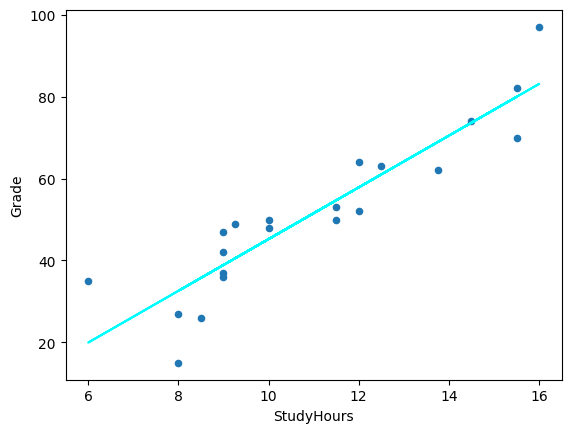

Observe que esta vez el código ha trazado dos cosas distintas: el diagrama de dispersión de las horas de estudio de la muestra y las calificaciones se traza como antes y, a continuación, se traza una línea de mejor ajuste basada en los coeficientes de regresión por mínimos cuadrados.

Los coeficientes de pendiente e intercepción calculados para la línea de regresión se muestran encima del gráfico.

La línea se basa en los valores de f(x) calculados para cada valor de StudyHours. Ejecute la siguiente celda para ver una tabla que incluye los siguientes valores:

Las Horas de Estudio de cada estudiante.<br>
La Calificación obtenida por cada alumno.<br>
El valor f(x) calculado usando los coeficientes de la línea de regresión.<br>
El error entre el valor f(x) calculado y el valor real de la nota.<br>
Algunos de los errores, sobre todo en los extremos, son bastante grandes (hasta más de 17,5 puntos de nota). Pero, en general, la línea se aproxima bastante a las calificaciones reales.

In [ ]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

Uso de los coeficientes de regresión para la predicción<br>
Ahora que tiene los coeficientes de regresión para la relación entre el tiempo de estudio y la nota, puede utilizarlos en una función para estimar la nota esperada para una cantidad determinada de estudio.

In [ ]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Así, aplicando la estadística a los datos de la muestra, se ha determinado una relación entre el tiempo de estudio y la nota y se ha encapsulado esa relación en una función general que puede utilizarse para predecir una nota para una cantidad determinada de tiempo de estudio.

Esta técnica es, de hecho, la premisa básica del aprendizaje automático. Puede tomar un conjunto de datos de muestra que incluya una o más características (en este caso, el número de horas estudiadas) y un valor de etiqueta conocido (en este caso, la nota obtenida) y utilizar los datos de muestra para derivar una función que calcule los valores de etiqueta predichos para cualquier conjunto dado de características.

Resumen
Hemos visto:

Qué es un valor atípico y cómo eliminarlo
Cómo pueden estar sesgados los datos
Cómo observar la dispersión de los datos
Formas básicas de comparar variables, como las notas y el tiempo de estudio
Lecturas adicionales
Para saber más sobre los paquetes de Python que has explorado en este cuaderno, consulta la siguiente documentación:

https://numpy.org/doc/stable/<br>
https://pandas.pydata.org/pandas-docs/stable/<br>
https://matplotlib.org/contents.html <br>

challenge<br>
https://github.com/MicrosoftDocs/ml-basics/blob/master/challenges/01%20-%20Flights%20Challenge.ipynb